<a href="https://colab.research.google.com/github/saeedd1/draw/blob/main/DL_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[0]


array([6], dtype=uint8)

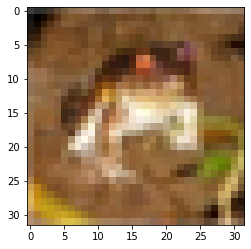

In [ ]:

plt.imshow(X_train[0])


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
num_class = y_test.shape[1] #10

In [ ]:
X_train.shape[1:]

(32, 32, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)       

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 11s 12ms/step - loss: 1.5112 - accuracy: 0.4608 - val_loss: 1.6348 - val_accuracy: 0.4483
Epoch 2/30
782/782 [==============================] - 9s 11ms/step - loss: 1.0880 - accuracy: 0.6169 - val_loss: 0.9498 - val_accuracy: 0.6633
Epoch 3/30
782/782 [==============================] - 8s 10ms/step - loss: 0.9203 - accuracy: 0.6771 - val_loss: 0.8414 - val_accuracy: 0.7073
Epoch 4/30
782/782 [==============================] - 8s 10ms/step - loss: 0.8340 - accuracy: 0.7085 - val_loss: 0.7006 - val_accuracy: 0.7541
Epoch 5/30
782/782 [==============================] - 8s 10ms/step - loss: 0.7609 - accuracy: 0.7359 - val_loss: 0.6898 - val_accuracy: 0.7595
Epoch 6/30
782/782 [==============================] - 8s 10ms/step - loss: 0.7131 - accuracy: 0.7516 - val_loss: 0.7092 - val_accuracy: 0.7535
Epoch 7/30
782/782 [==============================] - 8s 10ms/step - loss: 0.6719 - accuracy: 0.7646 - val_loss: 0.6681 - val_accuracy: 0.767

In [ ]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [ ]:
import pandas as pd

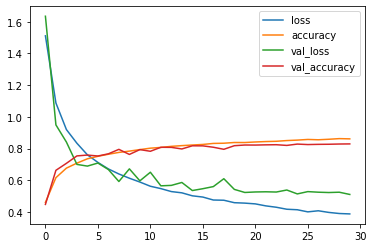

In [ ]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show>

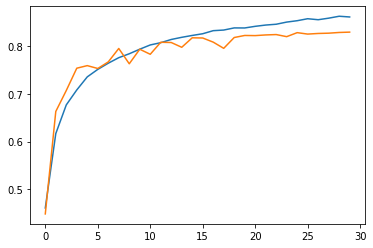

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [ ]:
model.save('CNN_cifar10.h5')

In [ ]:
model2 = load_model('CNN_cifar10.h5')

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
import numpy as np
import seaborn as sns; sns.set()

In [ ]:
np.argmax(model2.predict(X_test[0:10])[0])

3

In [ ]:
labels[3]

'cat'

In [ ]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

(10000, 10)
[3 8 8 ... 5 1 7]


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

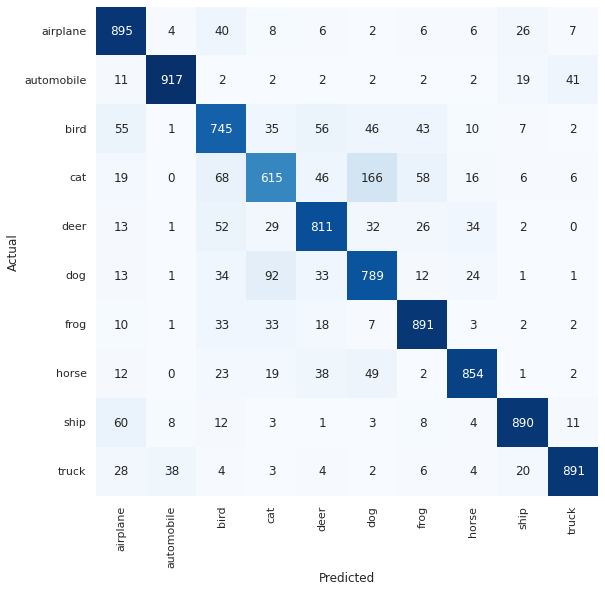

In [ ]:
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)
rounded_labels=np.argmax(y_test, axis=1)

cm = confusion_matrix(rounded_labels, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

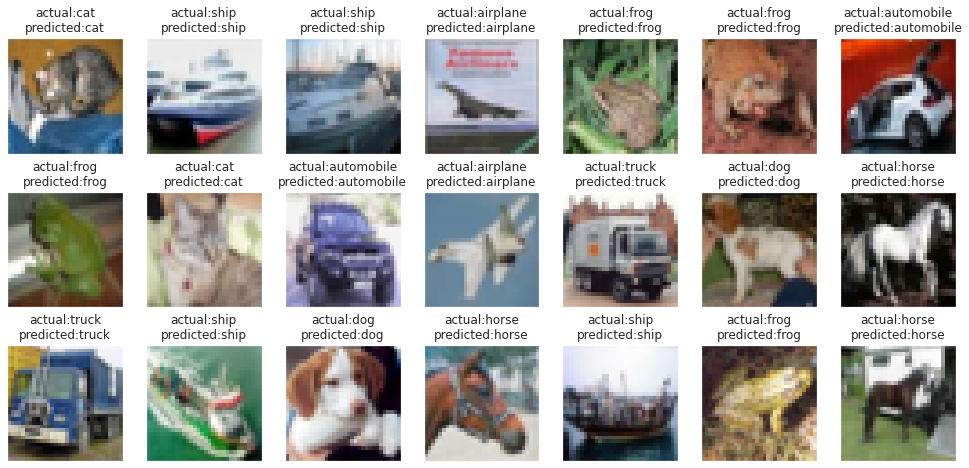

In [ ]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[rounded_labels[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()